# Dam of Candies
Geek wants to make a special space for candies on his bookshelf. Currently, it has $N$ books of different heights and unit width. Help him select $2$ books such that he can store maximum candies between them by removing all the other books from between the selected books. The task is to find out the area between $2$ books that can hold the maximum candies without changing the original position of selected books. 

In [1]:
import random

## $O\left(N^2\right)$-time, $O(1)$-space solution
An $O(N^2)$ solution is straightforward so we use that to check the correctness of a more efficient solution

In [2]:
def damOfCandies(arr):
    candies = 0
    interval = None
    for i, a in enumerate(arr):
        for j in range(i + 2, len(arr)):
            tmp = min(a, arr[j]) * (j - i - 1)
            if tmp > candies:
                candies = tmp
                interval = [i, j]
    return candies, interval

## Ideas for a more efficient solution

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [4]:
def plot(heights, fname):
    x_pos = [i for i in range(len(heights))]
    plt.figure(figsize=(4, 3))
    plt.bar(x_pos, heights, color='green')
    plt.xlabel('location')
    plt.ylabel('height of books')
    plt.xticks(range(len(heights)))
    plt.savefig(fname, dpi=100, bbox_inches='tight')

**Observation 1:** We have linear solution if the heights is monotonically increasing or decreasing.
For example, in the case of increasing sequences, the maximum area can be calculated by

maximum area = 8


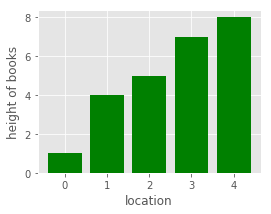

In [5]:
heights = [1, 4, 5, 7, 8]
plot(heights, './document/plot_increasing.png')

maxArea = max([h * (len(heights) - i - 2) for i, h in enumerate(heights[:-2])])
print(f'maximum area = {maxArea}')

**Observation 2:** If the sequence is like a hill or plateau, a linear solution is also possible.

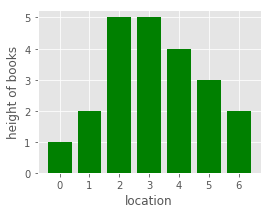

In [6]:
heights = [1, 2, 5, 5, 4, 3, 2]
plot(heights, './document/plot_hillOrPlateau.png')

Let starts with $i = 0$ and $j = N - 1$. The first area is $(N - 2) \cdot \min\left(h_0, h_{n - 1}\right)$. Then, we can increase $i$ and/or decrease $j$ to obtain a potentially bigger area. There three cases we need to consider:
1. $h_0 < h_{n - 1}$: In this case, moving $j$ to the left only decrease the area, so we increase $i$ by $1$;
1. $h_0 > h_{n - 1}$: In this case, moving $i$ to the right only decrease the area, so we decrease $j$ by $1$;
1. $h_0 = h_{n - 1}$: In this case, we need increase $i$ by $1$ and decrease $j$ by $1$ to obtain a possible increase in area.

The following code can find the maximum area:

In [7]:
i, j, maxArea = 0, len(heights) - 1, 0
while i < j:
    l, r = heights[i], heights[j]
    maxArea = max(maxArea, (j - i - 1) * min(l, r))
    i += int(l <= r)
    j -= int(l >= r)
print(f'maximum area = {maxArea}')

maximum area = 8


**Observation 3:** Dippings Doesn't count. 
As an example, the maximum area of following example is formed by the two boundary books while the shorter books in between don't matter.

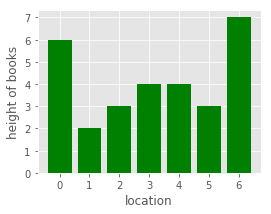

In [8]:
heights = [6, 2, 3, 4, 4, 3, 7]
plot(heights, './document/plot_dipping.png')

Observation 3 implies that we only need to consider the "contour" of book determined "local maxima". See the following example.

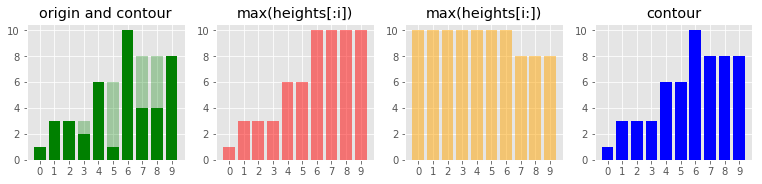

In [9]:
heights = [1, 3, 3, 2, 6, 1, 10, 4, 4, 8]
# plot(heights, './document/plot_arbitray.png')

N = len(heights)
max_L, l = [], 0
max_R, r = [], 0
for i in range(N):
    l = max(l, heights[i])
    max_L.append(l)
    r = max(r, heights[N - i - 1])
    max_R.append(r)

contour = [min(max_L[i], max_R[N - i - 1]) for i in range(N)]

fig, axes = plt.subplots(1, 4, figsize=(13, 2.5))
axes[0].bar(range(N), contour, color='green', alpha=.3)
axes[0].bar(range(N), heights, color='green')
axes[0].set_title('origin and contour')
axes[1].bar(range(N), max_L, color='red', alpha=.5)
axes[1].set_title(f'max(heights[:i])')
axes[2].bar(range(N)[::-1], max_R, color='orange', alpha=.5)
axes[2].set_title(f'max(heights[i:])')
axes[3].bar(range(N), contour, color='blue')
axes[3].set_title('contour')
for ax in axes:
    ax.set_xticks(range(N))
plt.savefig('./document/plot_localMaximaAndContour.png', dpi=200, transparent=False, bbox_inches='tight')

The contour gives the same result as the original height sequence. Since getting the contour also takes linear time, there is an $O(N)$-time solution. Note that we _don't_ have to save the contour sequence, which means we can design an $O(1)$-space solution, as follows.

## $O(N)$-time $O(1)$-space solution

In [10]:
def damOfCandiesLinear(heights):
    N = len(heights)

    l, r = 0, 0
    i, j, candies = 0, 0, 0
    while (N - 2) - (i + j) > 0:
        width = (N - 2) - (i + j)
        l, r = max(l, heights[i]), max(r, heights[N - 1 - j])
        candies = max(candies, width * min(l, r))
        i += int(l <= r)
        j += int(l >= r)

    return candies

## Tests

In [11]:
num_tries = 20

for t in range(num_tries):
    print(f'{t}:')
    N = random.randint(5, 15)
    heights = [random.randint(1, 10) for _ in range(N)]
    print(f'\theights = {heights}')

    candies, [i, j] = damOfCandies(heights)
    print(f'\tN-squared method = {candies}')

    candiesLinear = damOfCandiesLinear(heights)
    print(f'\tLinear method = {candies}')

0:
	heights = [4, 5, 7, 6, 7, 9, 5, 7]
	N-squared method = 28
	Linear method = 28
1:
	heights = [3, 1, 3, 9, 9, 7, 1, 8]
	N-squared method = 24
	Linear method = 24
2:
	heights = [3, 6, 10, 6, 8, 1, 3, 8, 2]
	N-squared method = 32
	Linear method = 32
3:
	heights = [2, 4, 5, 7, 6, 2, 10, 9, 3, 10, 8]
	N-squared method = 42
	Linear method = 42
4:
	heights = [5, 2, 1, 1, 4]
	N-squared method = 12
	Linear method = 12
5:
	heights = [5, 5, 5, 7, 9, 4, 4, 3, 9, 7, 9]
	N-squared method = 45
	Linear method = 45
6:
	heights = [1, 1, 7, 10, 3, 2, 1, 3, 2, 5, 2]
	N-squared method = 30
	Linear method = 30
7:
	heights = [9, 3, 5, 9, 3, 9, 10, 2, 5, 6, 5, 10, 1, 10, 3]
	N-squared method = 108
	Linear method = 108
8:
	heights = [6, 3, 7, 4, 10, 3, 1, 4, 4, 6]
	N-squared method = 48
	Linear method = 48
9:
	heights = [1, 6, 5, 8, 1, 8, 10, 7, 5, 3, 7]
	N-squared method = 48
	Linear method = 48
10:
	heights = [8, 3, 7, 5, 5, 5, 9, 8, 4, 8, 8, 8]
	N-squared method = 80
	Linear method = 80
11:
	heights = [7